# Foreign Interest Rate shock - Further comments

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt share of HtM households](#toc3_1_)    
    - 3.1.1. [Effect on bequest and savings](#toc3_1_1_)    
    - 3.1.2. [Effect on consumption](#toc3_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-v0_8-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline') # create an instance of the model

In [ ]:
par = model.par                 #set model parameters
ss = model.ss                   #create namespace for steady state
sol = model.sol                 #create namespace for solution

In [3]:
parameter = 'Lambda'                                                        #set parameter 
parvalues = [0.,0.25,0.5]                                                   #set parameter values
par.t_b = 0                                                                 #flexible tax rate
par.delta_B = 0                                                             #flexible tax rate
ModelList = model.multi_model(parameter,parvalues,constant_wage = True)     #create a list of model. One for each value.

Jacobian calculated in 1.0 mins 6 secs
Jacobian calculated in 28.2 secs
Jacobian calculated in 28.3 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

In [5]:
Tshock = 50                                                 #length of shock
persistence = 0.80**np.arange(Tshock)                       #persistence of shock 

In [6]:
for i in range(len(ModelList)):
    ModelList[i].set_exo_ss()                                                                       #set steady state exogenous variables
    ModelList[i].set_unknowns_ss()                                                                  #set steady state unknown variables

    ModelList[i].sol.r_hh[:Tshock] = ModelList[i].ss.r_hh + 0.01*ModelList[i].ss.r_hh*persistence   #shock to foreign interest rate

    ModelList[i].find_IRF()                                                                         #find impulse response functions


initial:
t1-t0 = 0.00000 secs
it = 2
    max. abs. error = 4.16e-12
    4.16e-12 in A_R_ini_error
    1.38e-12 in Aq_diff
    3.33e-15 in FOC_capital_agency
    8.17e-13 in FOC_K_ell
    3.00e-12 in mkt_clearing
    3.20e-14 in PC

solve: t1-t0 = 0.08686 secs
evaluate + update: t3-t2 = 0.06582 secs
initial:
t1-t0 = 0.02493 secs
it = 2
    max. abs. error = 3.97e-12
    3.97e-12 in A_R_ini_error
    9.85e-13 in Aq_diff
    2.44e-15 in FOC_capital_agency
    6.04e-13 in FOC_K_ell
    2.93e-12 in mkt_clearing
    3.97e-14 in PC

solve: t1-t0 = 0.15840 secs
evaluate + update: t3-t2 = 0.06869 secs
initial:
t1-t0 = 0.02692 secs
it = 2
    max. abs. error = 3.77e-12
    3.77e-12 in A_R_ini_error
    6.22e-13 in Aq_diff
    2.33e-15 in FOC_capital_agency
    3.92e-13 in FOC_K_ell
    2.83e-12 in mkt_clearing
    3.18e-14 in PC

solve: t1-t0 = 0.09587 secs
evaluate + update: t3-t2 = 0.07380 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt share of HtM households](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Effect on bequest and savings](#toc0_)

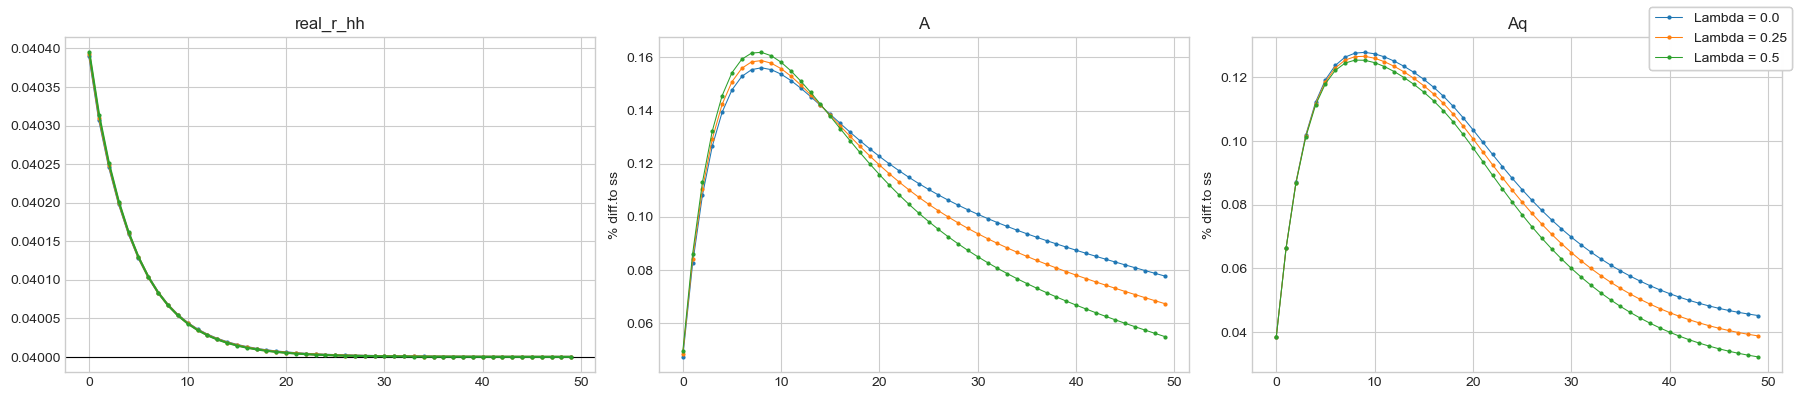

In [7]:
model.plot_IRF_models(ModelList,varlist=['real_r_hh','A','Aq'],ncol=3,abs=['real_r_hh'],parameter=parameter,parvalues=parvalues)

#### 3.1.2. <a id='toc3_1_2_'></a>[Effect on consumption](#toc0_)

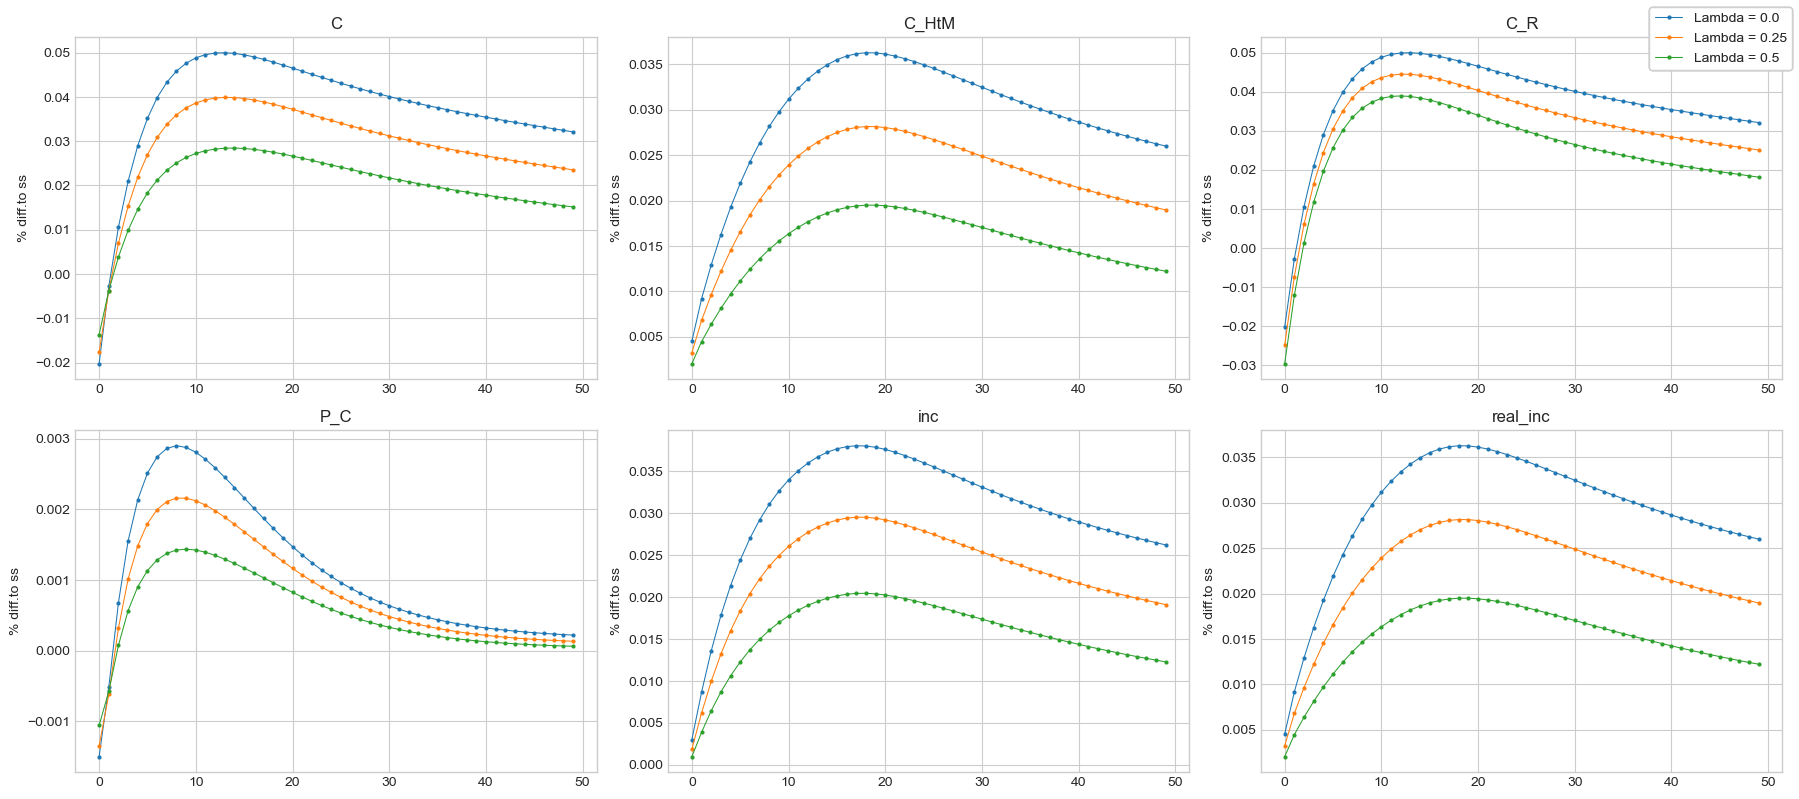

In [8]:
model.plot_IRF_models(ModelList,varlist=['C','C_HtM','C_R','P_C','inc','real_inc'],ncol=3,parameter=parameter,parvalues=parvalues)